In [21]:
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
import numpy as np
import sqlite3
import math


import matplotlib
import matplotlib.pyplot as plt

Syftet med den här är att mäta avståndet mellan huvudgruppernas medelpunkter.

In [2]:
conn = sqlite3.connect('../livs.db')  # Create db and establish connection
conn.row_factory = sqlite3.Row
curs = conn.cursor()
result = []
rows = curs.execute('select * from livs limit 4000')
for row in rows:
        result.append(row)

db_contents = np.array(result)
print (db_contents)

conn.close()

[['Talg nöt' '1' 656.3 ..., 'Övrigt fett (ister, talg, kokosfett)' 86 None]
 ['Späck gris' '2' 763.0 ..., 'Övrigt fett (ister, talg, kokosfett)' 86
  None]
 ['Ister gris' '3' 884.3 ..., 'Övrigt fett (ister, talg, kokosfett)' 86
  None]
 ..., 
 ['Havredryck oberikad' '5964' 40.6 ...,
  'Vegetabiliska produkter och mjölkersättning' 46 None]
 ['Kryddblandning taco' '5973' 372.6 ..., 'Kryddor' 112 None]
 ['Tortilla wrap' '5974' 313.7 ..., 'Mjukt bröd' 12 'train']]


In [3]:
columns = np.array([ 2,  4,  5,  6])
# Possible columns: [ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]
# Kolumner som inte predicerar så mycket: [22, 24, 29, 30, 31, 41, 45]

In [22]:
#Skapa dataset som alla rader och de kolumner som valts i columns
dataset = db_contents[:,columns].astype(float)

main_groups = np.array(list(set(db_contents.T[60]))).reshape(-1, 1) 

#Skapa hela matrisen med kolumner för alla medelvärden
main_groups=np.hstack((main_groups,np.empty([len(main_groups),len(columns)])))
print(main_groups)

[['' '-3.105036184601418e+231' '-3.105036184601418e+231'
  '2.2513105015e-314' '-1.212929711007614e+224']
 ['Vatten mineralvatten' '0.0' '0.0' '0.0' '0.0']
 ['Fisk o skaldjursprodukter o rätter' '0.0' '0.0' '0.0' '0.0']
 ['Färskost o kvarg' '2.250369105e-314' '2.992833438689636e+130' '0.0'
  '0.0']
 ['Lightdrycker u energi' '0.0' '0.0' '0.0' '0.0']
 ['Soja-  veteprotein o quorn' '0.0' '0.0' '0.0' '0.0']
 ['Grönsaks- rotfrukts- baljväxträtter och produkter' '0.0' '0.0' '0.0'
  '0.0']
 ['Pasta' '0.0' '0.0' '0.0' '0.0']
 ['Starksprit' '0.0' '0.0' '0.0' '0.0']
 ['Rom, kaviar' '0.0' '0.0' '0.0' '0.0']
 ['Bullar kakor tårtor mm' '0.0' '0.0' '2.2500300256e-314'
  '-1.0571333601561847e+140']
 ['Svamp' '0.0' '0.0' '2.251311284e-314' '-9.625987649683986e+65']
 ['Blodprodukter o rätter' '0.0' '0.0' '2.2499939865e-314'
  '9.465321364294577e-114']
 ['Sylta' '2.2504113337e-314' '3.1860565587375972e+227' '0.0' '0.0']
 ['Kryddor' '0.0' '0.0' '0.0' '0.0']
 ['Baljväxter (bönor, linser och ärter)' '0.0' 

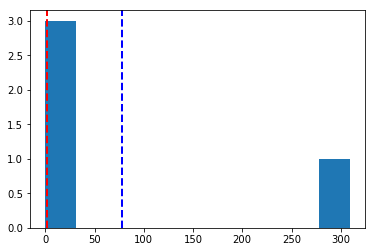

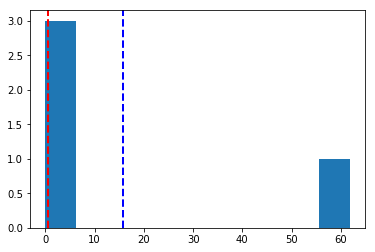

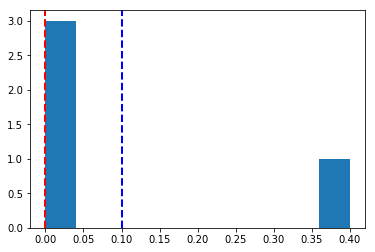

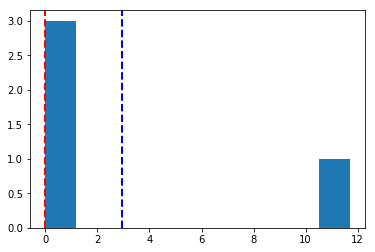

In [82]:
m_group = 'Te'
for column in range(len(columns)):
    group_members = np.where(db_contents[:,60]==m_group)
    a = dataset[group_members]
    #mean = np.mean(dataset[group_members], axis=0)
    plt.axvline(a[:,column].mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(np.median(a[:,column]), color='r', linestyle='dashed', linewidth=2)
    plt.hist(a[:,column])
    plt.show()

In [20]:
# Fyll matrisen main_groups med medelvärdena i alla kolumner
for row in main_groups:
    group_members = np.where(db_contents[:,60]==row[0]) # group_members blir index för alla livsmedel som tillhör den aktuella huvudgruppen
    column_means=np.mean(dataset[group_members], axis=0) # blir medelvärdena kolumn för kolumn för den aktuella huvudgruppens livsmedel
    row[1:]=column_means # Sätt medelvärdena på plats i den stora matrisen som är main_groups/huvudgrupper
    print(row)

['' '216.54285714285717' '11.528571428571428' '9.6' '14.385714285714286']
['Vatten mineralvatten' '56.22' '7.902' '1.6273333333333333' '2.09']
['Fisk o skaldjursprodukter o rätter' '187.2623188405797'
 '9.551159420289855' '10.500434782608693' '13.42666666666666']
['Färskost o kvarg' '189.48' '2.9066666666666667' '14.814' '11.402']
['Lightdrycker u energi' '2.625' '0.6125' '0.0' '0.0125']
['Soja-  veteprotein o quorn' '168.16666666666666' '6.8'
 '6.016666666666667' '19.586666666666666']
['Grönsaks- rotfrukts- baljväxträtter och produkter' '107.57454545454543'
 '8.765636363636363' '5.867272727272726' '3.518363636363635']
['Pasta' '225.41904761904763' '45.50761904761905' '1.3538095238095242'
 '5.967142857142856']
['Starksprit' '226.28571428571428' '4.028571428571429' '0.0' '0.0']
['Rom, kaviar' '202.29999999999998' '11.183333333333332' '10.365' '16.05']
['Bullar kakor tårtor mm' '402.09302325581405' '52.30441860465117'
 '18.317906976744187' '5.7123255813953495']
['Svamp' '26.8555555555555

In [6]:
threshold = 0.9999

In [7]:
cos_sim = cosine_similarity(main_groups[:,1:], Y=None)

In [8]:
similars = np.where(cos_sim[4]>threshold)

In [9]:
main_groups[similars]

array([['Lightdrycker u energi', '2.625', '0.6125', '0.0', '0.0125'],
       ['Saft läsk cider u alkohol', '75.8736842105263',
        '18.610526315789468', '0.0', '0.06315789473684211'],
       ['Sockerfritt godis', '401.8', '98.9', '0.0', '0.0'],
       ['Sötningsmedel', '406.3', '100.0', '0.0', '0.0'],
       ['Tuggummi', '365.3', '89.4', '0.0', '0.5'],
       ['Sportdrycker energidrycker', '34.15', '8.4', '0.0', '0.0'],
       ['Frukt o bär konserverade', '77.17647058823529',
        '17.5764705882353', '0.12352941176470592', '0.42941176470588244'],
       ['Socker sirap honung', '365.2', '89.83333333333333', '0.0',
        '0.049999999999999996'],
       ['Fruktjuice mm', '49.75', '11.436363636363637',
        '0.08181818181818185', '0.4777272727272727'],
       ['Sylt marmelad gelé äppelmos o dyl', '178.67222222222222',
        '42.62555555555556', '0.14388888888888887', '0.32055555555555565'],
       ['Ättika vinäger', '36.333333333333336', '8.666666666666666', '0.0',
        '0

In [10]:
cos_sim_avg = cosine_similarity(main_groups_avg, Y=None)

NameError: name 'main_groups_avg' is not defined

In [11]:
np.mean(cos_sim_avg[0])

NameError: name 'cos_sim_avg' is not defined

In [12]:
np.argsort (cos_sim[1])[-2]

73

In [13]:
np.argsort (cos_sim_avg[1])

NameError: name 'cos_sim_avg' is not defined

In [14]:
np.where

<function numpy.core.multiarray.where>

In [15]:
similar = main_groups[np.argsort (cos_sim)][::-1] #[::-1] vänder på listan https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order

In [16]:
similar.shape

(119, 119, 5)

In [17]:
print(np.mean(main_groups_avg, axis=1, keepdims=True))

NameError: name 'main_groups_avg' is not defined

In [42]:
a = [x**2 for x in range(8)]
a

[0, 1, 4, 9, 16, 25, 36, 49]

In [60]:
a = np.array([99,99,99,99,99], dtype=float)

In [61]:
# Från https://github.com/oliviaguest/gini/blob/master/gini.py 
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))



In [90]:
# From https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy 
def gini2(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)
    x += 0.0000001
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [91]:
gini2(a)

0.74412798604791086

In [92]:
main_groups = np.array(list(set(db_contents.T[60]))).reshape(-1, 1)

In [93]:
main_groups

array([[''],
       ['Vatten mineralvatten'],
       ['Fisk o skaldjursprodukter o rätter'],
       ['Färskost o kvarg'],
       ['Lightdrycker u energi'],
       ['Soja-  veteprotein o quorn'],
       ['Grönsaks- rotfrukts- baljväxträtter och produkter'],
       ['Pasta'],
       ['Starksprit'],
       ['Rom, kaviar'],
       ['Bullar kakor tårtor mm'],
       ['Svamp'],
       ['Blodprodukter o rätter'],
       ['Sylta'],
       ['Kryddor'],
       ['Baljväxter (bönor, linser och ärter)'],
       ['Fisk stekt ej panerad'],
       ['Vegetabiliska produkter och mjölkersättning'],
       [ 'Övrigt animaliskt *kött*, grodlår, sniglar, säl - färskt, fryst, tillagat'],
       ['Pizza paj pirog färdig smörgås'],
       ['Fågelprodukter o rätter'],
       ['Skaldjur bläckfisk konserverad'],
       ['Smältost'],
       ['Smör'],
       ['Saft läsk cider u alkohol'],
       ['Frukt o bär'],
       ['Osträtter'],
       ['Algprodukter'],
       ['Hårt bröd'],
       ['Äggprodukter o rätter'],
 

In [101]:
threshold = 0.2
for main_group in main_groups:
    group_members = np.where(db_contents[:,60]==main_group)
    a = dataset[group_members]
    if gini(a[:,0]) > threshold:
        print(main_group, len(a), gini2(a[:,0]), gini2(a[:,0]))

[''] 7 0.401014080074 0.401014079889
['Vatten mineralvatten'] 15 0.420380251436 0.420380250688
['Fisk o skaldjursprodukter o rätter'] 69 0.210993387963 0.21099338785
['Färskost o kvarg'] 15 0.267478244411 0.26747824427
['Lightdrycker u energi'] 4 0.673809498141 0.673809472472
['Grönsaks- rotfrukts- baljväxträtter och produkter'] 55 0.320197410377 0.32019741008
['Pasta'] 21 0.249454279045 0.249454278934
['Rom, kaviar'] 6 0.259350799015 0.259350798887
['Sylta'] 3 0.250227977248 0.250227977111
['Baljväxter (bönor, linser och ärter)'] 51 0.415464237393 0.415464237074
['Fisk stekt ej panerad'] 7 0.302407232053 0.302407231897
['Vegetabiliska produkter och mjölkersättning'] 13 0.371195447537 0.371195447116
['Saft läsk cider u alkohol'] 19 0.419913545799 0.419913545245
['Grönsaker'] 94 0.410146180074 0.410146179106
['Kost- o näringspreparat'] 8 0.572265624627 0.572265624255
['Sallad blandad mat'] 10 0.271011072544 0.271011072298
['Grädde creme fraiche'] 23 0.275032208727 0.275032208592
['Kaffe

In [97]:
gini(a[:,0])

0.44333205746742832